In [1]:
%%capture
!pip install -U efficientnet

EfficientNetB0 - (224, 224, 3)  
EfficientNetB1 - (240, 240, 3)  
EfficientNetB2 - (260, 260, 3)  
EfficientNetB3 - (300, 300, 3)  
EfficientNetB4 - (380, 380, 3)  
EfficientNetB5 - (456, 456, 3)  
EfficientNetB6 - (528, 528, 3)  
EfficientNetB7 - (600, 600, 3)  

In [2]:
import pandas as pd
import numpy as np
import cv2

In [3]:
#read the annottion file
annotation=pd.read_excel('../input/odir-labels/ODIR-5K_Training_Annotations(Updated)_V2.xlsx')

In [4]:

#normal (N), diabetes (D), glaucoma (G), cataract (C), AMD (A), hypertension (H), myopia (M) and other diseases/abnormalities (O)

In [5]:
#print first 5 rows of annotation file
#annotation=annotation.sample(frac=1)
annotation.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [6]:
from sklearn.model_selection import train_test_split
annotation, val = train_test_split(annotation, test_size = 0.2,  random_state = 73)

In [7]:
# for i in ['G',	'C',	'A',	'H',	'M']:
#   duplicate=annotation[annotation[i]==1]
#   annotation=annotation.append([duplicate]*10,ignore_index=True)

In [8]:
annotation.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
3225,4371,58,Female,4371_left.jpg,4371_right.jpg,moderate non proliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
2030,2653,31,Male,2653_left.jpg,2653_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
3054,4194,50,Female,4194_left.jpg,4194_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0
1558,2096,74,Male,2096_left.jpg,2096_right.jpg,mild nonproliferative retinopathy,cataract,0,1,0,1,0,0,0,0
3059,4199,67,Female,4199_left.jpg,4199_right.jpg,moderate non proliferative retinopathy，hyperte...,hypertensive retinopathy,0,1,0,0,0,1,0,0


In [9]:
val.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
2891,4009,60,Male,4009_left.jpg,4009_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
1811,2434,54,Male,2434_left.jpg,2434_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
441,442,56,Male,442_left.jpg,442_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
1589,2127,70,Male,2127_left.jpg,2127_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0
526,527,48,Male,527_left.jpg,527_right.jpg,branch retinal vein occlusion,normal fundus,0,0,0,0,0,0,0,1


In [10]:
test=pd.read_csv('../input/odir-labels/XYZ_ODIR.csv')
print(len(test))
test.head()


500


,ID,N,D,G,C,A,H,M,O
0,937,0,0,0,0,0,0,0,0
1,967,0,0,0,0,0,0,0,0
2,988,0,0,0,0,0,0,0,0
3,995,0,0,0,0,0,0,0,0
4,1000,0,0,0,0,0,0,0,0


In [11]:
print(len(annotation))
print(len(val))
print(len(test))

2800
700
500


In [12]:
left_test=[]
right_test=[]
ID=[]
for i in test['ID']:
    ID.append(i)
    left_test.append(str(i)+'_left.jpg')
    right_test.append(str(i)+'_right.jpg')

name_df=pd.DataFrame(zip(ID,left_test,right_test),columns=['ID','Left-Fundus','Right-Fundus'])
name_df.head()
result = pd.merge(name_df, test, on='ID')
result.head()

,ID,Left-Fundus,Right-Fundus,N,D,G,C,A,H,M,O
0,937,937_left.jpg,937_right.jpg,0,0,0,0,0,0,0,0
1,967,967_left.jpg,967_right.jpg,0,0,0,0,0,0,0,0
2,988,988_left.jpg,988_right.jpg,0,0,0,0,0,0,0,0
3,995,995_left.jpg,995_right.jpg,0,0,0,0,0,0,0,0
4,1000,1000_left.jpg,1000_right.jpg,0,0,0,0,0,0,0,0


In [13]:
img_shape=380

In [14]:
#https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy
def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [15]:
def load_ben_color(image, sigmaX=10):
    #image = cv2.imread(path)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (img_shape, img_shape))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
    
    
    return image

In [16]:
from keras_preprocessing.image import ImageDataGenerator

train_data_gen= ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=360,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #zoom_range=.1,
    rescale=1/255,
    #fill_mode='nearest',
    #shear_range=0.1,
    #brightness_range=[0.5, 1.5],
    preprocessing_function=load_ben_color
)

val_data_gen= ImageDataGenerator(
    rescale=1/255
    
)

In [17]:
def get_flow_from_dataframe(generator, dataframe,directory_path,
                            image_shape=(img_shape, img_shape),
                            #subset='training',
                             batch_size=35):
    train_generator_1 = generator.flow_from_dataframe(dataframe,
                                                      directory=directory_path,
                                                      target_size=(img_shape,img_shape),
                                                      x_col="Left-Fundus",
                                                      y_col=['N','D','G','C','A','H','M','O'],
                                                      class_mode='other',
                                                      shuffle=False,
                                                      batch_size=batch_size,
                                                      seed=7,
                                                      classes=['N','D','G','C','A','H','M','O'],
                                                      #subset=subset
                                                      )

    train_generator_2 = generator.flow_from_dataframe(dataframe, 
                                                      directory=directory_path,
                                                      target_size=(img_shape,img_shape),
                                                      x_col="Right-Fundus",
                                                      y_col=['N','D','G','C','A','H','M','O'],
                                                      class_mode='other',
                                                      shuffle=False,
                                                      batch_size=batch_size,
                                                      seed=7,
                                                      classes=['N','D','G','C','A','H','M','O'],                                                  
                                                      #subset=subset
                                                      )
    while True:
        x_1 = train_generator_1.next()
        x_2 = train_generator_2.next()

        yield [x_1[0], x_2[0]], x_1[1]

In [18]:
batch_size=15
train_gen = get_flow_from_dataframe(train_data_gen, annotation, image_shape=(img_shape, img_shape),
                                        directory_path="../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images",batch_size=batch_size)
valid_gen = get_flow_from_dataframe(train_data_gen, val, image_shape=(img_shape, img_shape),
                                        directory_path="../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images",batch_size=batch_size)
test_gen = get_flow_from_dataframe(train_data_gen, result, image_shape=(img_shape, img_shape),
                                        directory_path="../input/ocular-disease-recognition-odir5k/ODIR-5K/Testing Images",batch_size=batch_size)

In [19]:
img_shape

380

In [20]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization,Input,MaxPooling2D,GlobalMaxPooling2D,concatenate
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf


In [21]:
wt='../input/efficientnet-keras-noisystudent-weights-b0b7/efficientnet-b4_noisy-student_notop.h5'
from efficientnet.tfkeras import EfficientNetB4
from keras.applications.vgg16 import VGG16
import keras
left_input=Input(shape=(img_shape,img_shape,3))
right_input=Input(shape=(img_shape,img_shape,3))

left_model = EfficientNetB4(input_shape =  (img_shape,img_shape,3), include_top = False, weights = wt,input_tensor=left_input)
right_model = EfficientNetB4(input_shape =  (img_shape,img_shape,3), include_top = False, weights = wt,input_tensor=right_input)

left_model.trainable = False
right_model.trainable = False

Using TensorFlow backend.


In [22]:
con = concatenate([left_model.output, right_model.output])
gap_dr = Dropout(0.5)(con)
GAP= GlobalAveragePooling2D()(gap_dr)
fc1=Dense(256, activation = 'relu')(GAP)
fc2=Dense(128, activation = 'relu')(fc1)
fc3=Dense(64, activation = 'relu')(fc2)
out = Dense(8, activation = 'sigmoid')(fc3)

In [23]:

for layer in right_model._layers:
    layer._name = layer._name + '_right'
for layer in left_model._layers:
    layer._name = layer._name + '_left'

left_model._name="left_eff"
right_model._name="right_eff"

In [24]:
model =Model(inputs=[left_input, right_input], outputs=out)


In [25]:
# from keras.utils import plot_model
# plot_model(model)

In [26]:
import keras.backend as K
def focal_loss(y_true, y_pred, alpha = 0.75, gamma = 2):
    alpha_factor = K.ones_like(y_true) * alpha
    alpha_factor = tf.where(K.equal(y_true, 1), alpha_factor, 1 - alpha_factor)
    focal_weight = tf.where(K.equal(y_true, 1), 1 - y_pred, y_pred)
    focal_weight = alpha_factor * focal_weight ** gamma
    loss = focal_weight * K.binary_crossentropy(y_true, y_pred)
    return loss

In [27]:
model.compile('adam',loss=focal_loss,metrics=['accuracy'])

In [28]:
step_size_train=len(annotation)/batch_size
step_size_val=len(val)/batch_size


In [29]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                              patience=3, min_lr=0.000001, verbose=1)


In [30]:
hist=model.fit(train_gen, epochs=1,
                        steps_per_epoch=step_size_train,
                        use_multiprocessing=False,
                        validation_data=valid_gen,
                        validation_steps=step_size_val,
                        verbose=2,callbacks=[reduce_lr],
                    
                        )

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:220: UserWarning: `classes` will be ignored given the class_mode="raw"
  .format(self.class_mode))


Found 2800 validated image filenames.
Found 2800 validated image filenames.
Found 700 validated image filenames.
Found 700 validated image filenames.
187/186 - 1344s - loss: 0.0414 - accuracy: 0.3175 - val_loss: 0.0391 - val_accuracy: 0.3914 - lr: 0.0010


In [31]:
hist

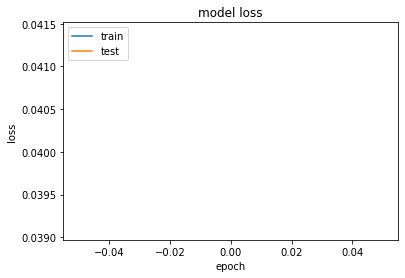

In [32]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
y_pred = model.predict(valid_gen,steps=step_size_val)
y_pred1=y_pred.copy()
y_pred1[y_pred1>=0.5] = 1
y_pred1[y_pred1<0.5] = 0
y_pred1=y_pred1.astype(int)

In [34]:
y_true=val.iloc[:,-8::].values
y_true.shape

(700, 8)

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_true, y_pred1)

array([[[ 55, 415],
        [ 27, 203]],

       [[ 19, 457],
        [  8, 216]],

       [[662,   5],
        [ 33,   0]],

       [[613,  42],
        [ 44,   1]],

       [[661,   0],
        [ 39,   0]],

       [[681,   0],
        [ 19,   0]],

       [[638,  23],
        [ 39,   0]],

       [[134, 384],
        [ 50, 132]]])

In [36]:
target_names = ['N','D','G','C','A','H','M','O']
print(classification_report(y_true, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

           N       0.33      0.88      0.48       230
           D       0.32      0.96      0.48       224
           G       0.00      0.00      0.00        33
           C       0.02      0.02      0.02        45
           A       0.00      0.00      0.00        39
           H       0.00      0.00      0.00        19
           M       0.00      0.00      0.00        39
           O       0.26      0.73      0.38       182

   micro avg       0.29      0.68      0.41       811
   macro avg       0.12      0.32      0.17       811
weighted avg       0.24      0.68      0.35       811
 samples avg       0.29      0.69      0.40       811



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.metrics import classification_report,cohen_kappa_score
cohen_kappa_score(y_true.flatten(), y_pred1.flatten())

0.2610897311452176

In [38]:
#model.load_weights('model.h5')

In [39]:
y_test= model.predict(test_gen,steps=len(test)/batch_size)


Found 500 validated image filenames.
Found 500 validated image filenames.


In [40]:
for i,j in enumerate(['N','D','G','C','A','H','M','O']):
    test[j]=y_test[:,i]

In [41]:
test.head()

,ID,N,D,G,C,A,H,M,O
0,937,0.565141,0.612121,0.367233,0.224139,0.238431,0.314779,0.106141,0.507522
1,967,0.535142,0.617777,0.318843,0.125208,0.288398,0.338110,0.126451,0.508373
2,988,0.545278,0.606730,0.356492,0.182700,0.273112,0.336054,0.154254,0.515554
3,995,0.555603,0.647412,0.322693,0.139048,0.239833,0.318549,0.086209,0.503334
4,1000,0.573900,0.586680,0.436465,0.271524,0.264364,0.264375,0.153224,0.523331


In [42]:
test.to_csv('TAC_ODIR.csv',index=False)